In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
#Carga de librerias
from PIL import Image
import os
import numpy as np

# Ruta a la carpeta que contiene las imágenes
folder_path = '/content/drive/My Drive/perros/Todo'

# Lista para almacenar las imágenes cargadas
image_list = []
#Lista para almacenar las etiquetas
y = []
# Recorre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if 'perro' in filename:
      y.append(0) #indice 0 perro [perro,persona,casa]
    elif 'persona' in filename: #indice 1 persona
      y.append(1)
    elif 'casa' in filename: #indice 2 casa
      y.append(2)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize((224, 224))  # Redimensiona la imagen
        img_array = np.array(img) / 255.0  # Normaliza los valores de píxeles
        image_list.append(img_array)


# Ahora 'image_list_train' contiene todas las imágenes cargadas


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_list, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
#Carga de librerias
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
def crear_modelo():
  #keras.utils.set_random_seed(20)#812
  #Se establece un modelo neuronal
  model = Sequential()
  model.add(Flatten(input_shape=(224, 224, 3)))  # Aplanar la imagen
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(3, activation='softmax')) #3 es el numero de clases
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [33]:
#Cambiamos la forma
X_train = np.array(X_train)
y_train = np.array(y_train)

In [34]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [35]:
X_train.shape

(26, 224, 224, 3)

In [36]:
#Verificamos el cambio
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [37]:
type(y_train)

numpy.ndarray

In [38]:
y_train.shape

(26, 3)

In [39]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
# Configurar la validación cruzada con K-Fold


checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracies = []
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = crear_modelo()

    # Entrenar el modelo
    history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[checkpoint])

    # Evaluar el modelo
    loss, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    accuracies.append(accuracy)

    print(f"Fold {fold_no} - Accuracy: {accuracy:.4f}")
    fold_no += 1

# Evaluar el modelo en el conjunto de prueba
#test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
#print(f"Test Accuracy: {test_accuracy:.4f}")

print(f"Mean Cross-Validation Accuracy: {np.mean(accuracies):.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 1 - Accuracy: 0.3333
Fold 2 - Accuracy: 1.0000
Fold 3 - Accuracy: 0.2000
Fold 4 - Accuracy: 0.4000
Fold 5 - Accuracy: 0.2000
Mean Cross-Validation Accuracy: 0.4267


In [40]:
#Cambiamos el formato al conjunto de prueba
X_test = np.array(X_test)
y_test = np.array(y_test)

In [41]:
if len(y_test.shape) == 0:
    y_test = y_test.reshape(1,)

In [42]:
print(y_test.shape)
print(X_test.shape)

(7,)
(7, 224, 224, 3)


In [43]:
#Verificamos su forma
y_test

array([0, 0, 0, 2, 1, 1, 2])

In [44]:
model.load_weights('best_model.keras')

In [45]:
#Usamos el modelo para predecir con el conjunto de prueba
y_pred = model.predict(X_test) #Esto genera una salida predicha

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [46]:
#Revisamos el resultado
y_pred

array([[2.8367904e-01, 7.1632087e-01, 9.9640445e-08],
       [3.1543139e-02, 3.1907413e-02, 9.3654948e-01],
       [4.8387090e-09, 1.3367853e-08, 1.0000000e+00],
       [9.2646492e-01, 1.6337439e-07, 7.3534973e-02],
       [5.3065346e-04, 9.9946934e-01, 1.9108216e-14],
       [1.2322513e-06, 9.9999881e-01, 1.3777528e-20],
       [1.2813739e-10, 9.9995971e-01, 4.0349882e-05]], dtype=float32)

In [47]:
#Redondeamos los resultados
y_pred=np.round(y_pred)
y_pred

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [48]:
#Se importan las librerias

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score


y_pred = np.argmax(y_pred, axis=1)
# Accuracy
# Métricas de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculamos precision, recall y f1 para cada clase
precision = precision_score(y_test, y_pred, average=None)
precision_avg = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average=None)
recall_avg = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average=None)
f1_avg = f1_score(y_test, y_pred, average="macro")
print("Exactitud:", accuracy)
print("Precisión por clase:", precision,'->', precision_avg)
print("Sensibilidad por clase:", recall,'->', recall_avg)
print("F1 Score por clase:", f1,'->', f1_avg)

Exactitud: 0.2857142857142857
Precisión por clase: [0.  0.5 0. ] -> 0.16666666666666666
Sensibilidad por clase: [0. 1. 0.] -> 0.3333333333333333
F1 Score por clase: [0.         0.66666667 0.        ] -> 0.2222222222222222


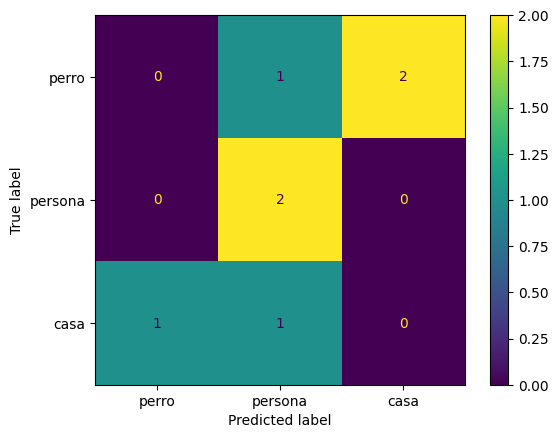

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels = ['perro','persona','casa']
disp.plot()

In [50]:
y_test

array([0, 0, 0, 2, 1, 1, 2])

In [51]:
y_pred

array([1, 2, 2, 0, 1, 1, 1])

In [52]:
X_test[5]

array([[[0.97254902, 0.97254902, 0.98039216],
        [0.96862745, 0.96862745, 0.97647059],
        [0.96862745, 0.96862745, 0.97647059],
        ...,
        [0.85882353, 0.8627451 , 0.87058824],
        [0.85882353, 0.8627451 , 0.87058824],
        [0.85882353, 0.8627451 , 0.87058824]],

       [[0.97254902, 0.97254902, 0.98039216],
        [0.96862745, 0.96862745, 0.97647059],
        [0.96862745, 0.96862745, 0.97647059],
        ...,
        [0.85882353, 0.8627451 , 0.87058824],
        [0.85882353, 0.8627451 , 0.87058824],
        [0.85882353, 0.8627451 , 0.87058824]],

       [[0.97254902, 0.97254902, 0.98039216],
        [0.96862745, 0.96862745, 0.97647059],
        [0.96862745, 0.96862745, 0.97647059],
        ...,
        [0.85882353, 0.8627451 , 0.87058824],
        [0.85882353, 0.8627451 , 0.87058824],
        [0.85882353, 0.8627451 , 0.87058824]],

       ...,

       [[0.92156863, 0.9254902 , 0.93333333],
        [0.92156863, 0.9254902 , 0.93333333],
        [0.92156863, 0

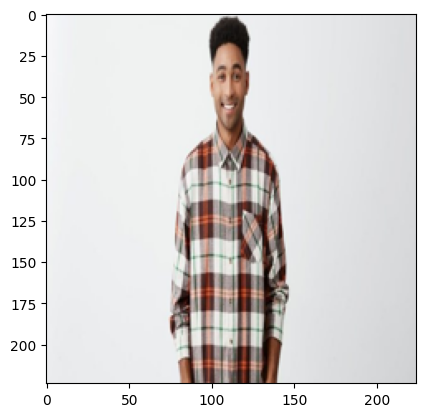

In [53]:
import matplotlib.pyplot as plt
img_array = (X_test[5] * 255).astype(np.uint8)  # Scale to 0-255 and convert to 8-bit integer
img = Image.fromarray(img_array)
plt.imshow(img)